Setup:
Save Data Files as follows:

In [203]:
# import matplotlib and pandas

from matplotlib import pyplot as plt
import pandas as pd
import datetime
import numpy as np

AC1 = pd.read_excel(r"Downloads/IceCold/AC1-3-18.xlsx")
print("AC1 Data Imported")

AC2 = pd.read_excel(r"Downloads/IceCold/AC2-3-18.xlsx")
print("AC2 Data Imported")

AC3 = pd.read_excel(r"Downloads/IceCold/AC3-3-18.xlsx")
print("AC3 Data Imported")

AC4 = pd.read_excel(r"Downloads/IceCold/AC4-3-18.xlsx")
print("AC4 Data Imported")

Butler = pd.read_excel(r"Downloads/IceCold/Butler-3-19.xlsx  ")
print("Butler Data Imported")

South_AC = pd.read_excel(r"Downloads/IceCold/SouthAC.xlsx")
print("South AC Data Imported")

South_DX1 = pd.read_excel(r"Downloads/IceCold/SouthDX1.xlsx")
print("South DX Data Imported")

South_DX2 = pd.read_excel(r"Downloads/IceCold/SouthDX-3-19.xlsx")
print("South DX Data Imported")

South_DX = pd.concat([South_DX1, South_DX2], axis=0, ignore_index=True)
print("South DX Data Combined")

weather_data = pd.read_csv("Downloads/EC - Epcot WeatherCSV (4)/OUTSIDE AIR TEMPERATURE.csv", header=0, skiprows=1)
# Remove the last 3 letters from each value in the "Date" column
weather_data['Date'] = weather_data['Date'].str[:-4]
print("Weather Data Imported")

AC1 Data Imported
AC2 Data Imported
AC3 Data Imported
AC4 Data Imported
Butler Data Imported
South AC Data Imported
South DX Data Imported
South DX Data Imported
South DX Data Combined
Weather Data Imported


In [204]:
# Filter AC data for business hours (excluding weekends)
AC1_business_hours = AC1[(AC1['Date-Time (EST/EDT)'].dt.time >= pd.Timestamp('08:00:00').time()) &
                         (AC1['Date-Time (EST/EDT)'].dt.time <= pd.Timestamp('17:00:00').time()) &
                         (~AC1['Date-Time (EST/EDT)'].dt.dayofweek.isin([5, 6]))].copy()

AC2_business_hours = AC2[(AC2['Date-Time (EST/EDT)'].dt.time >= pd.Timestamp('08:00:00').time()) &
                         (AC2['Date-Time (EST/EDT)'].dt.time <= pd.Timestamp('17:00:00').time()) &
                         (~AC2['Date-Time (EST/EDT)'].dt.dayofweek.isin([5, 6]))].copy()

AC3_business_hours = AC3[(AC3['Date-Time (EST/EDT)'].dt.time >= pd.Timestamp('08:00:00').time()) &
                         (AC3['Date-Time (EST/EDT)'].dt.time <= pd.Timestamp('17:00:00').time()) &
                         (~AC3['Date-Time (EST/EDT)'].dt.dayofweek.isin([5, 6]))].copy()

AC4_business_hours = AC4[(AC4['Date-Time (EST/EDT)'].dt.time >= pd.Timestamp('08:00:00').time()) &
                         (AC4['Date-Time (EST/EDT)'].dt.time <= pd.Timestamp('17:00:00').time()) &
                         (~AC4['Date-Time (EST/EDT)'].dt.dayofweek.isin([5, 6]))].copy()

Butler_business_hours = Butler[(Butler['Date-Time (EST/EDT)'].dt.time >= pd.Timestamp('08:00:00').time()) &
                               (Butler['Date-Time (EST/EDT)'].dt.time <= pd.Timestamp('17:00:00').time()) &
                               (~Butler['Date-Time (EST/EDT)'].dt.dayofweek.isin([5, 6]))].copy()

South_AC_business_hours = South_AC[(South_AC['Date-Time (EST/EDT)'].dt.time >= pd.Timestamp('08:00:00').time()) &
                                   (South_AC['Date-Time (EST/EDT)'].dt.time <= pd.Timestamp('17:00:00').time()) &
                                   (~South_AC['Date-Time (EST/EDT)'].dt.dayofweek.isin([5, 6]))].copy()

South_DX_business_hours = South_DX[(South_DX['Date-Time (EDT)'].dt.time >= pd.Timestamp('08:00:00').time()) &
                                   (South_DX['Date-Time (EDT)'].dt.time <= pd.Timestamp('17:00:00').time()) &
                                   (~South_DX['Date-Time (EDT)'].dt.dayofweek.isin([5, 6]))].copy()

# Split Date-Time (EST/EDT) column into separate Date and Time columns
AC1_business_hours['Date'] = AC1_business_hours['Date-Time (EST/EDT)'].dt.date
AC1_business_hours['Time'] = AC1_business_hours['Date-Time (EST/EDT)'].dt.time

AC2_business_hours['Date'] = AC2_business_hours['Date-Time (EST/EDT)'].dt.date
AC2_business_hours['Time'] = AC2_business_hours['Date-Time (EST/EDT)'].dt.time

AC3_business_hours['Date'] = AC3_business_hours['Date-Time (EST/EDT)'].dt.date
AC3_business_hours['Time'] = AC3_business_hours['Date-Time (EST/EDT)'].dt.time

AC4_business_hours['Date'] = AC4_business_hours['Date-Time (EST/EDT)'].dt.date
AC4_business_hours['Time'] = AC4_business_hours['Date-Time (EST/EDT)'].dt.time

Butler_business_hours['Date'] = Butler_business_hours['Date-Time (EST/EDT)'].dt.date
Butler_business_hours['Time'] = Butler_business_hours['Date-Time (EST/EDT)'].dt.time

South_AC_business_hours['Date'] = South_AC_business_hours['Date-Time (EST/EDT)'].dt.date
South_AC_business_hours['Time'] = South_AC_business_hours['Date-Time (EST/EDT)'].dt.time

South_DX_business_hours['Date'] = South_DX_business_hours['Date-Time (EDT)'].dt.date
South_DX_business_hours['Time'] = South_DX_business_hours['Date-Time (EDT)'].dt.time

# Calculate the mean amps for each AC unit for each day
AC1_daily_avg = AC1_business_hours.groupby('Date')[['Ch:1 - AC-1 A-Phase   (amp)', 'Ch:2 - AC-1 B-Phase   (amp)', 'Ch:3 - AC-1 C-Phase   (amp)']].mean().reset_index()
AC1_daily_avg['AC1_Avg_Amps'] = AC1_daily_avg[['Ch:1 - AC-1 A-Phase   (amp)', 'Ch:2 - AC-1 B-Phase   (amp)', 'Ch:3 - AC-1 C-Phase   (amp)']].mean(axis=1)

AC2_daily_avg = AC2_business_hours.groupby('Date')[['Ch:1 - AC-2 NE (A Phase)   (amp)', 'Ch:2 - AC-2 NE (B Phase)   (amp)', 'Ch:3 - AC-2 NE (C Phase)   (amp)']].mean().reset_index()
AC2_daily_avg['AC2_Avg_Amps'] = AC2_daily_avg[['Ch:1 - AC-2 NE (A Phase)   (amp)', 'Ch:2 - AC-2 NE (B Phase)   (amp)', 'Ch:3 - AC-2 NE (C Phase)   (amp)']].mean(axis=1)

AC3_daily_avg = AC3_business_hours.groupby('Date')[['Ch:1 - AC-3 NW (A Phase)   (amp)', 'Ch:2 - AC-3 NW (B Phase)   (amp)', 'Ch:3 - AC-3 NW (C Phase)   (amp)']].mean().reset_index()
AC3_daily_avg['AC3_Avg_Amps'] = AC3_daily_avg[['Ch:1 - AC-3 NW (A Phase)   (amp)', 'Ch:2 - AC-3 NW (B Phase)   (amp)', 'Ch:3 - AC-3 NW (C Phase)   (amp)']].mean(axis=1)

AC4_daily_avg = AC4_business_hours.groupby('Date')[['Ch:1 - AC-4 SE (A Phase)   (amp)', 'Ch:2 - AC-4 SE (B Phase)   (amp)', 'Ch:3 - AC-4 SE (C Phase)   (amp)']].mean().reset_index()
AC4_daily_avg['AC4_Avg_Amps'] = AC4_daily_avg[['Ch:1 - AC-4 SE (A Phase)   (amp)', 'Ch:2 - AC-4 SE (B Phase)   (amp)', 'Ch:3 - AC-4 SE (C Phase)   (amp)']].mean(axis=1)

Butler_daily_avg = Butler_business_hours.groupby('Date')[['Ch:1 - AC-1 (A Phase)   (amp)', 'Ch:2 - AC-1 (B Phase)   (amp)', 'Ch:3 - AC-1 (C Phase)   (amp)']].mean().reset_index()
Butler_daily_avg['Butler_Avg_Amps'] = Butler_daily_avg[['Ch:1 - AC-1 (A Phase)   (amp)', 'Ch:2 - AC-1 (B Phase)   (amp)', 'Ch:3 - AC-1 (C Phase)   (amp)']].mean(axis=1)

South_AC_daily_avg = South_AC_business_hours.groupby('Date')[['Ch:1 - AC-2 A-Phase   (amp)', 'Ch:2 - AC-2 B-Phase   (amp)', 'Ch:3 - AC-2 C-Phase   (amp)']].mean().reset_index()
South_AC_daily_avg['South_AC_Avg_Amps'] = South_AC_daily_avg[['Ch:1 - AC-2 A-Phase   (amp)', 'Ch:2 - AC-2 B-Phase   (amp)', 'Ch:3 - AC-2 C-Phase   (amp)']].mean(axis=1)

South_DX_daily_avg = South_DX_business_hours.groupby('Date')[['Ch:1 - DX-1 A-Phase   (amp)', 'Ch:2 - DX-1 B-Phase   (amp)', 'Ch:3 - DX-1 C-Phase   (amp)']].mean().reset_index()
South_DX_daily_avg['South_DX_Avg_Amps'] = South_DX_daily_avg[['Ch:1 - DX-1 A-Phase   (amp)', 'Ch:2 - DX-1 B-Phase   (amp)', 'Ch:3 - DX-1 C-Phase   (amp)']].mean(axis=1)

# Merge the daily average data for all AC units
daily_avg_amps = AC1_daily_avg[['Date', 'AC1_Avg_Amps']].merge(AC2_daily_avg[['Date', 'AC2_Avg_Amps']], on='Date', how='outer')
daily_avg_amps = daily_avg_amps.merge(AC3_daily_avg[['Date', 'AC3_Avg_Amps']], on='Date', how='outer')
daily_avg_amps = daily_avg_amps.merge(AC4_daily_avg[['Date', 'AC4_Avg_Amps']], on='Date', how='outer')
daily_avg_amps = daily_avg_amps.merge(Butler_daily_avg[['Date', 'Butler_Avg_Amps']], on='Date', how='outer')
daily_avg_amps = daily_avg_amps.merge(South_AC_daily_avg[['Date', 'South_AC_Avg_Amps']], on='Date', how='outer')
daily_avg_amps = daily_avg_amps.merge(South_DX_daily_avg[['Date', 'South_DX_Avg_Amps']], on='Date', how='outer')

print(weather_data.head())

# Convert 'Date' column to datetime
weather_data['Date'] = pd.to_datetime(weather_data['Date'], errors='coerce')

# Drop rows with invalid date values
weather_data = weather_data.dropna(subset=['Date'])


# Filter weather data for business hours
business_hours = (weather_data['Date'].dt.time >= pd.Timestamp('08:00:00').time()) & (weather_data['Date'].dt.time <= pd.Timestamp('18:00:00').time())
weather_business_hours = weather_data.loc[business_hours, ['Date', 'Value']].copy()


# Calculate max, min, and CDD based on 'Value' column
weather_business_hours['TemperatureMax'] = weather_business_hours.groupby(weather_business_hours['Date'].dt.date)['Value'].transform('max')
weather_business_hours['TemperatureMin'] = weather_business_hours.groupby(weather_business_hours['Date'].dt.date)['Value'].transform('min')
weather_business_hours['CDD'] = ((weather_business_hours['TemperatureMax'] + weather_business_hours['TemperatureMin']) / 2 - 65).clip(lower=0)

# Calculate the average CDD for each day
cdd_avg = weather_business_hours.groupby(weather_business_hours['Date'].dt.date)['CDD'].mean().reset_index()

print(cdd_avg.head())

CDDAmpData = daily_avg_amps.merge(cdd_avg)

# Define the installation date as a pandas Timestamp
installation_date = pd.Timestamp('2023-09-15')

# Convert Date column to Timestamp
CDDAmpData['Date'] = pd.to_datetime(CDDAmpData['Date'])

# Filter the DataFrame for pre-install and post-install datasets
pre_install_data = CDDAmpData[CDDAmpData['Date'] < installation_date].copy()
post_install_data = CDDAmpData[CDDAmpData['Date'] >= installation_date].copy()


# Write to excel file
with pd.ExcelWriter("PrePostIceCold.xlsx") as writer:
    pre_install_data.to_excel(writer, sheet_name="Pre Install", index=False)
    post_install_data.to_excel(writer, sheet_name="Post Install", index=False)

                    Date    Excel Time     Value Notes
0  4/14/2023 09:20:00 AM  45030.388889  76.83330   NaN
1  4/14/2023 09:30:00 AM  45030.395833  78.21250   NaN
2  4/14/2023 09:40:00 AM  45030.402778  78.40273   NaN
3  4/14/2023 09:50:00 AM  45030.409722  79.37293   NaN
4  4/14/2023 10:00:00 AM  45030.416667  79.54015   NaN
         Date        CDD
0  2023-04-14  18.663875
1  2023-04-15  19.462500
2  2023-04-16  15.925770
3  2023-04-17   6.584560
4  2023-04-18   7.027438


In [208]:

# Function to categorize CDD values into the defined ranges with customizable range size
def categorize_cdd(cdd, range_size):
    cdd_ranges = [(i, i + range_size) for i in range(0, 24, range_size)]
    for i, (start, end) in enumerate(cdd_ranges):
        if start <= cdd < end:
            return f"{start}-{end}"

# Define range size
range_size = 3

# Make a copy of the DataFrame to avoid SettingWithCopyWarning
pre_install_data = pre_install_data.copy()
post_install_data = post_install_data.copy()

post_install_data = post_install_data[post_install_data['Date'] >= pd.Timestamp('2023-10-09')]

# Apply categorization to pre-install dataset using .loc
pre_install_data.loc[:, 'CDD Range'] = pre_install_data['CDD'].apply(categorize_cdd, range_size=range_size)

# Apply categorization to post-install dataset using .loc
post_install_data.loc[:, 'CDD Range'] = post_install_data['CDD'].apply(categorize_cdd, range_size=range_size)

# Convert 'CDD Range' to categorical data type with desired order
cdd_range_categories = [f"{i}-{i+range_size}" for i in range(0, 24, range_size)]
pre_install_data['CDD Range'] = pd.Categorical(pre_install_data['CDD Range'], categories=cdd_range_categories, ordered=True)
post_install_data['CDD Range'] = pd.Categorical(post_install_data['CDD Range'], categories=cdd_range_categories, ordered=True)

pre_install_grouped = pre_install_data.groupby('CDD Range', observed=False)[['AC1_Avg_Amps', 'AC2_Avg_Amps', 'AC3_Avg_Amps', 'AC4_Avg_Amps', 'Butler_Avg_Amps', 'South_AC_Avg_Amps', 'South_DX_Avg_Amps', 'CDD']].mean().sort_index()

post_install_grouped = post_install_data.groupby('CDD Range', observed=False)[['AC1_Avg_Amps', 'AC2_Avg_Amps', 'AC3_Avg_Amps', 'AC4_Avg_Amps', 'Butler_Avg_Amps', 'South_AC_Avg_Amps', 'South_DX_Avg_Amps', 'CDD']].mean().sort_index()

# Calculate sample counts for pre-install data
pre_install_sample_counts = pre_install_data.groupby('CDD Range', observed=False).size()

# Calculate sample counts for post-install data
post_install_sample_counts = post_install_data.groupby('CDD Range', observed=False).size()

# Add sample counts as a new column
pre_install_grouped['Sample Count'] = pre_install_sample_counts
post_install_grouped['Sample Count'] = post_install_sample_counts

# Display the grouped data
print("Pre-Install Data:")
print(pre_install_grouped)

print("\nPost-Install Data:")
print(post_install_grouped)

Pre-Install Data:
           AC1_Avg_Amps  AC2_Avg_Amps  AC3_Avg_Amps  AC4_Avg_Amps  \
CDD Range                                                           
0-3                 NaN           NaN           NaN           NaN   
3-6                 NaN           NaN           NaN           NaN   
6-9                 NaN           NaN           NaN           NaN   
9-12                NaN           NaN           NaN           NaN   
12-15               NaN           NaN           NaN           NaN   
15-18         12.030858      8.637080     11.529765     11.854790   
18-21         16.606079     13.052532     12.200946     17.764070   
21-24         18.330824     14.711016     12.439857     20.718734   

           Butler_Avg_Amps  South_AC_Avg_Amps  South_DX_Avg_Amps        CDD  \
CDD Range                                                                     
0-3                    NaN                NaN                NaN        NaN   
3-6                    NaN                NaN         

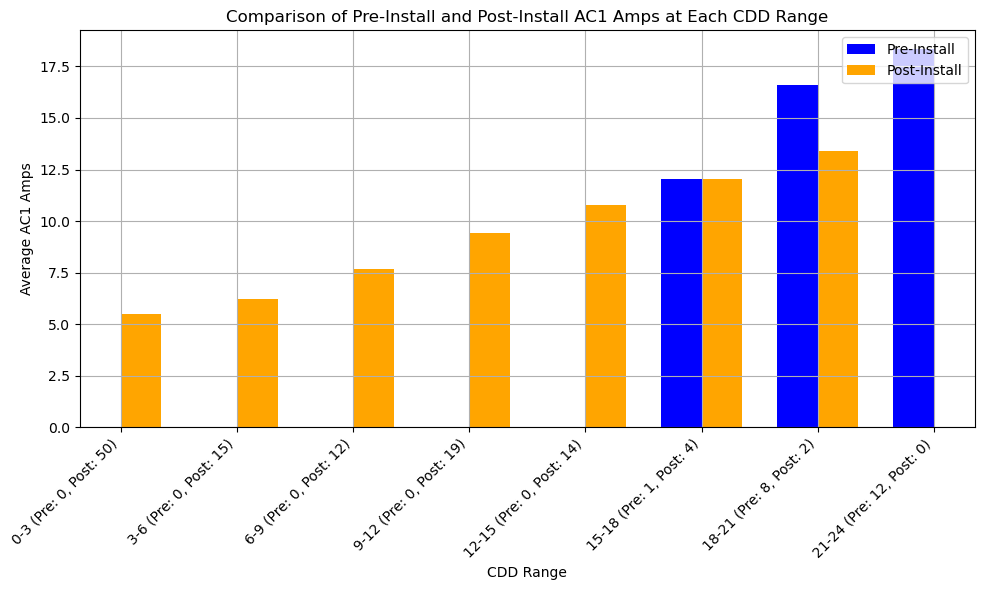

Percent Change in ACAC1 Amps for Each CDD Range:
  CDD Range  Percent Change in AC1 Amps
0       0-3                         NaN
1       3-6                         NaN
2       6-9                         NaN
3      9-12                         NaN
4     12-15                         NaN
5     15-18                    0.052565
6     18-21                   19.336841
7     21-24                         NaN




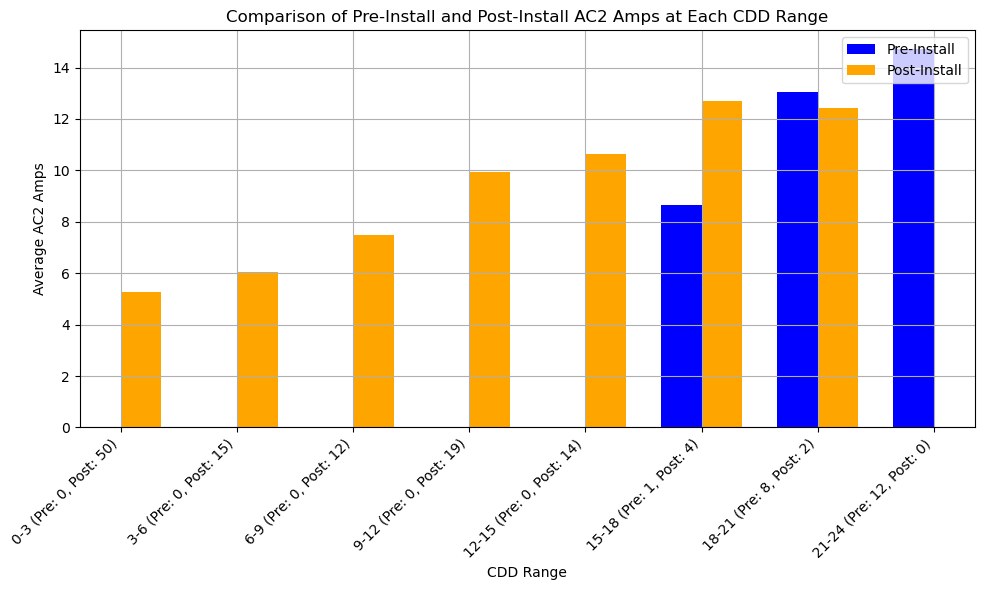

Percent Change in ACAC2 Amps for Each CDD Range:
  CDD Range  Percent Change in AC2 Amps
0       0-3                         NaN
1       3-6                         NaN
2       6-9                         NaN
3      9-12                         NaN
4     12-15                         NaN
5     15-18                  -46.953203
6     18-21                    4.798091
7     21-24                         NaN




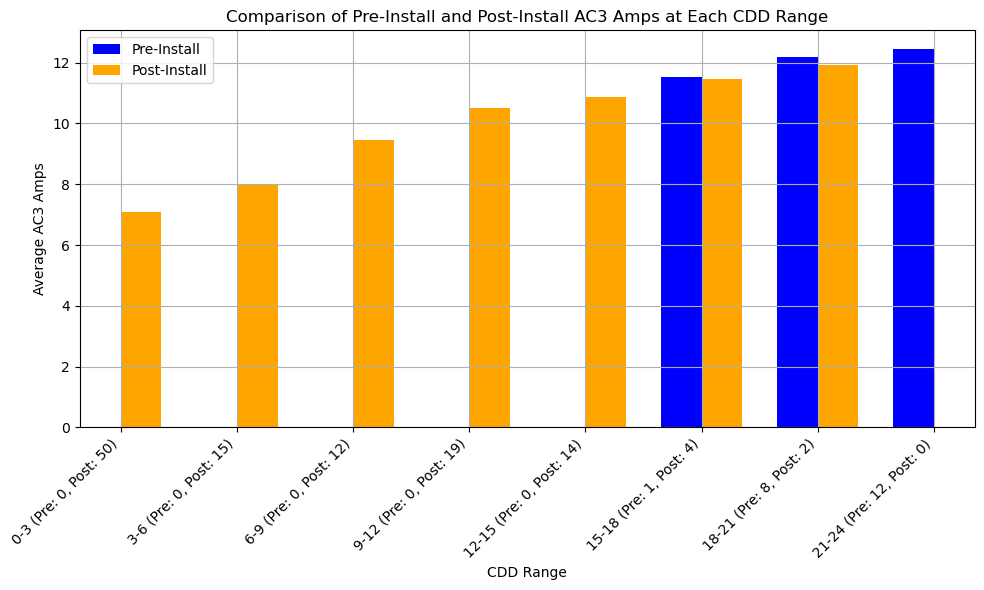

Percent Change in ACAC3 Amps for Each CDD Range:
  CDD Range  Percent Change in AC3 Amps
0       0-3                         NaN
1       3-6                         NaN
2       6-9                         NaN
3      9-12                         NaN
4     12-15                         NaN
5     15-18                    0.623775
6     18-21                    2.213487
7     21-24                         NaN




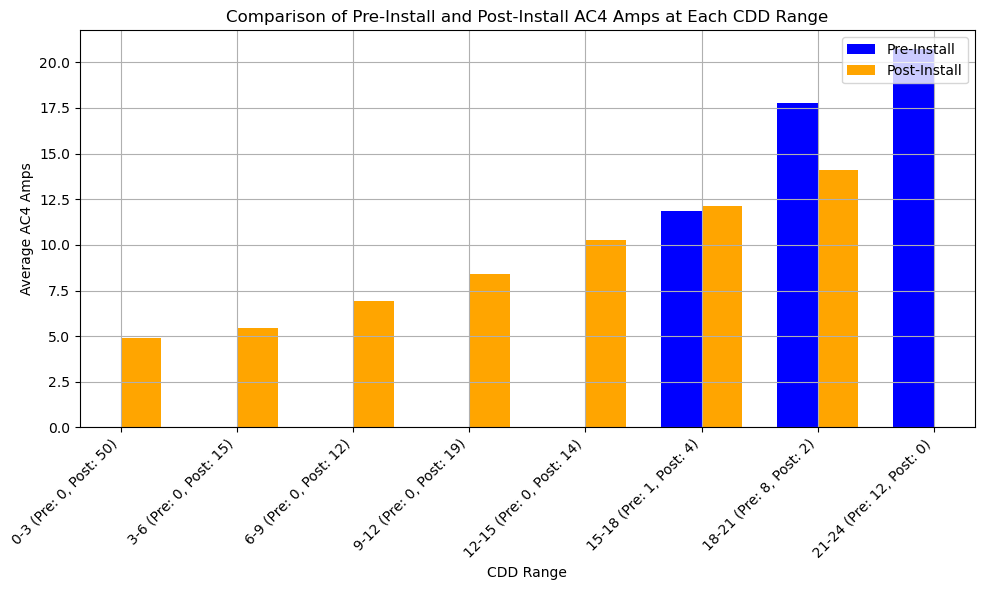

Percent Change in ACAC4 Amps for Each CDD Range:
  CDD Range  Percent Change in AC4 Amps
0       0-3                         NaN
1       3-6                         NaN
2       6-9                         NaN
3      9-12                         NaN
4     12-15                         NaN
5     15-18                   -2.118576
6     18-21                   20.642648
7     21-24                         NaN




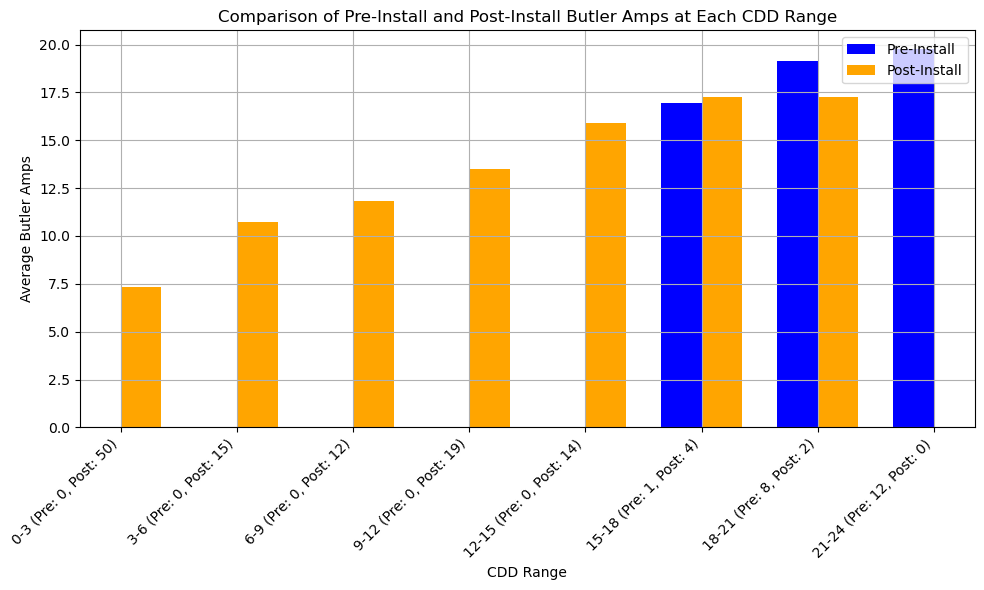

Percent Change in ACButler Amps for Each CDD Range:
  CDD Range  Percent Change in Butler Amps
0       0-3                            NaN
1       3-6                            NaN
2       6-9                            NaN
3      9-12                            NaN
4     12-15                            NaN
5     15-18                      -2.139192
6     18-21                       9.730377
7     21-24                            NaN




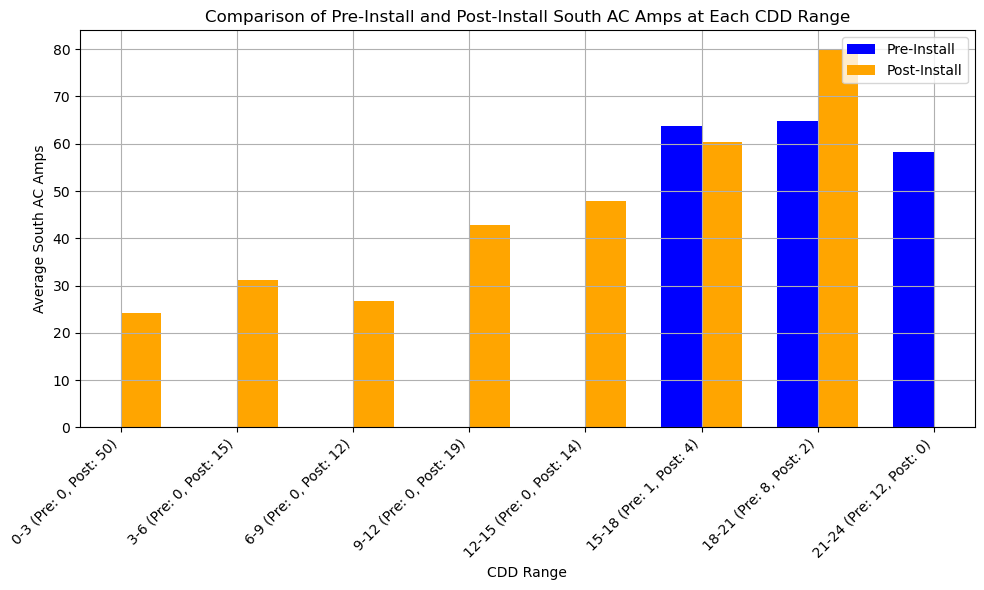

Percent Change in ACSouth_AC Amps for Each CDD Range:
  CDD Range  Percent Change in South_AC Amps
0       0-3                              NaN
1       3-6                              NaN
2       6-9                              NaN
3      9-12                              NaN
4     12-15                              NaN
5     15-18                         5.404681
6     18-21                       -23.283768
7     21-24                              NaN




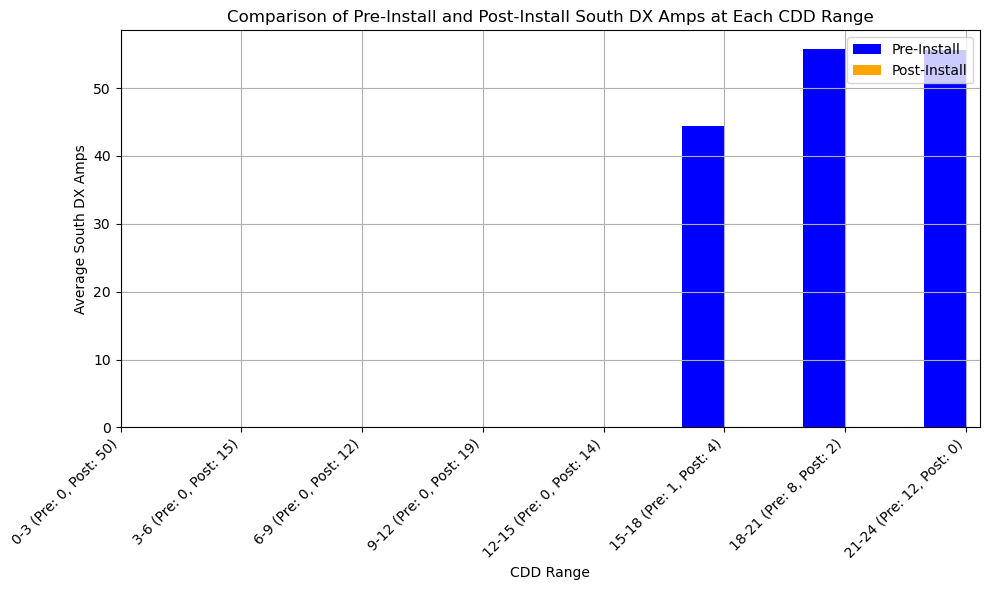

Percent Change in ACSouth_DX Amps for Each CDD Range:
  CDD Range  Percent Change in South_DX Amps
0       0-3                              NaN
1       3-6                              NaN
2       6-9                              NaN
3      9-12                              NaN
4     12-15                              NaN
5     15-18                              NaN
6     18-21                              NaN
7     21-24                              NaN




In [209]:
# Calculate percent change for AC1, AC2, AC3, and AC4 Amps
percent_change_ac1 = ((pre_install_grouped['AC1_Avg_Amps'] - post_install_grouped['AC1_Avg_Amps']) / pre_install_grouped['AC1_Avg_Amps']) * 100
percent_change_ac2 = ((pre_install_grouped['AC2_Avg_Amps'] - post_install_grouped['AC2_Avg_Amps']) / pre_install_grouped['AC2_Avg_Amps']) * 100
percent_change_ac3 = ((pre_install_grouped['AC3_Avg_Amps'] - post_install_grouped['AC3_Avg_Amps']) / pre_install_grouped['AC3_Avg_Amps']) * 100
percent_change_ac4 = ((pre_install_grouped['AC4_Avg_Amps'] - post_install_grouped['AC4_Avg_Amps']) / pre_install_grouped['AC4_Avg_Amps']) * 100
percent_change_butler = ((pre_install_grouped['Butler_Avg_Amps'] - post_install_grouped['Butler_Avg_Amps']) / pre_install_grouped['Butler_Avg_Amps']) * 100
percent_change_south_ac = ((pre_install_grouped['South_AC_Avg_Amps'] - post_install_grouped['South_AC_Avg_Amps']) / pre_install_grouped['South_AC_Avg_Amps']) * 100
percent_change_south_dx = ((pre_install_grouped['South_DX_Avg_Amps'] - post_install_grouped['South_DX_Avg_Amps']) / pre_install_grouped['South_DX_Avg_Amps']) * 100

# Create DataFrames for the percent change data
percent_change_df_ac1 = pd.DataFrame({'CDD Range': percent_change_ac1.index, 'Percent Change in AC1 Amps': percent_change_ac1.values})
percent_change_df_ac2 = pd.DataFrame({'CDD Range': percent_change_ac2.index, 'Percent Change in AC2 Amps': percent_change_ac2.values})
percent_change_df_ac3 = pd.DataFrame({'CDD Range': percent_change_ac3.index, 'Percent Change in AC3 Amps': percent_change_ac3.values})
percent_change_df_ac4 = pd.DataFrame({'CDD Range': percent_change_ac4.index, 'Percent Change in AC4 Amps': percent_change_ac4.values})
percent_change_df_butler = pd.DataFrame({'CDD Range': percent_change_butler.index, 'Percent Change in Butler Amps': percent_change_butler.values})
percent_change_df_south_ac = pd.DataFrame({'CDD Range': percent_change_south_ac.index, 'Percent Change in South_AC Amps': percent_change_south_ac.values})
percent_change_df_south_dx = pd.DataFrame({'CDD Range': percent_change_south_dx.index, 'Percent Change in South_DX Amps': percent_change_south_dx.values})

# Define the width of each bar
bar_width = 0.35

# Plot bar graphs for each AC
for ac, percent_change_df in zip(['AC1', 'AC2', 'AC3', 'AC4', 'Butler', 'South_AC', 'South_DX'], [percent_change_df_ac1, percent_change_df_ac2, percent_change_df_ac3, percent_change_df_ac4, percent_change_df_butler, percent_change_df_south_ac, percent_change_df_south_dx]):

    # Define the x-axis positions for the bars
    x_pre = np.arange(len(pre_install_grouped))
    x_post = [x + bar_width for x in x_pre]

    # Plot bar graph comparing pre and post amps
    plt.figure(figsize=(10, 6))
    plt.bar(x_pre, pre_install_grouped[f'{ac}_Avg_Amps'], color='blue', width=bar_width, label='Pre-Install')
    plt.bar(x_post, post_install_grouped[f'{ac}_Avg_Amps'], color='orange', width=bar_width, label='Post-Install')
    plt.xlabel('CDD Range')
    plt.title(f'Comparison of Pre-Install and Post-Install {ac.replace("_", " ")} Amps at Each CDD Range')
    plt.ylabel(f'Average {ac.replace("_", " ")} Amps')
    plt.xticks([r + bar_width / 2 for r in range(len(pre_install_grouped))], pre_install_grouped.index, rotation=45)
    # Create tick labels with sample counts
    tick_labels = [f"{cdd_range} (Pre: {pre_count}, Post: {post_count})"
                   for cdd_range, pre_count, post_count in zip(pre_install_grouped.index,
                                                               pre_install_grouped['Sample Count'],
                                                               post_install_grouped['Sample Count'])]

    plt.xticks([r + bar_width / 2 for r in range(len(pre_install_grouped))], tick_labels, rotation=45, ha='right')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Display the table
    print(f"Percent Change in AC{ac} Amps for Each CDD Range:")
    print(percent_change_df)
    print("\n")

In [212]:
def find_comparable_days(pre_data, post_data, cdd_tolerance, min_date_diff):
    comparable_pairs = []
    for index_pre, row_pre in pre_data.iterrows():
        pre_date = row_pre['Date']
        for index_post, row_post in post_data.iterrows():
            post_date = row_post['Date']
            date_diff = (post_date - pre_date).days
            if (abs(row_pre['CDD'] - row_post['CDD']) <= cdd_tolerance and
                date_diff >= min_date_diff and
                post_date >= pd.Timestamp('2023-10-09')):
                comparable_pairs.append((index_pre, index_post))
                break
    return comparable_pairs

# Function to calculate percent change
def calculate_percent_change(pre_data, post_data, comparable_pairs):
    percent_changes = []
    for index_pre, index_post in comparable_pairs:
        avg_amp_pre = pre_data.loc[index_pre, ['AC1_Avg_Amps', 'AC2_Avg_Amps', 'AC3_Avg_Amps', 'AC4_Avg_Amps', 'Butler_Avg_Amps', 'South_AC_Avg_Amps', 'South_DX_Avg_Amps']].mean()
        avg_amp_post = post_data.loc[index_post, ['AC1_Avg_Amps', 'AC2_Avg_Amps', 'AC3_Avg_Amps', 'AC4_Avg_Amps', 'Butler_Avg_Amps', 'South_AC_Avg_Amps', 'South_DX_Avg_Amps']].mean()
        percent_change = ((avg_amp_post - avg_amp_pre) / avg_amp_pre) * 100
        percent_changes.append(percent_change)
    return percent_changes

# Find comparable days with a CDD tolerance of 0.5 and a minimum date difference of 20 days
# and post-install dates after 10/9/23
comparable_pairs = find_comparable_days(pre_install_data, post_install_data, cdd_tolerance=1.0, min_date_diff=0)

# Calculate percent change
percent_changes = calculate_percent_change(pre_install_data, post_install_data, comparable_pairs)

import pandas as pd

# Initialize lists to store data
data = []

# Iterate through comparable pairs
for i, (index_pre, index_post) in enumerate(comparable_pairs):
    pre_ac_amps = [
        pre_install_data.loc[index_pre, 'AC1_Avg_Amps'],
        pre_install_data.loc[index_pre, 'AC2_Avg_Amps'],
        pre_install_data.loc[index_pre, 'AC3_Avg_Amps'],
        pre_install_data.loc[index_pre, 'AC4_Avg_Amps'],
        pre_install_data.loc[index_pre, 'Butler_Avg_Amps'],
        pre_install_data.loc[index_pre, 'South_AC_Avg_Amps'],
        pre_install_data.loc[index_pre, 'South_DX_Avg_Amps']
    ]

    post_ac_amps = [
        post_install_data.loc[index_post, 'AC1_Avg_Amps'],
        post_install_data.loc[index_post, 'AC2_Avg_Amps'],
        post_install_data.loc[index_post, 'AC3_Avg_Amps'],
        post_install_data.loc[index_post, 'AC4_Avg_Amps'],
        post_install_data.loc[index_post, 'Butler_Avg_Amps'],
        post_install_data.loc[index_post, 'South_AC_Avg_Amps'],
        post_install_data.loc[index_post, 'South_DX_Avg_Amps']
    ]

    percent_changes_ac = [((pre_amp - post_amp) / pre_amp) * 100 for pre_amp, post_amp in zip(pre_ac_amps, post_ac_amps)]

    # Construct row data
    row_data = {
        'Pre Date': pre_install_data.loc[index_pre, 'Date'],
        'Post Date': post_install_data.loc[index_post, 'Date'],
        'Pre CDD': pre_install_data.loc[index_pre, 'CDD'],
        'Post CDD': post_install_data.loc[index_post, 'CDD']
    }

    for j in range(1, 8):
        row_data[f'Pre{j}'] = pre_ac_amps[j - 1]
        row_data[f'Post{j}'] = post_ac_amps[j - 1]
        row_data[f'PC{j}'] = percent_changes_ac[j - 1]

    # Append row to data list
    data.append(row_data)

# Create DataFrame
df = pd.DataFrame(data)

# Display DataFrame
print(df)

df.to_excel('CompDays.xlsx')

    Pre Date  Post Date    Pre CDD   Post CDD       Pre1      Post1  \
0 2023-08-18 2023-10-13  20.405995  20.071475  14.515691  14.599846   
1 2023-08-29 2023-10-12  20.090560  19.370750  19.341167  12.190130   
2 2023-08-30 2023-11-10  16.125515  17.101640  12.030858  10.822037   
3 2023-09-01 2023-10-12  18.955393  19.370750  18.763000  12.190130   
4 2023-09-04 2023-10-12  18.964375  19.370750  15.876160  12.190130   
5 2023-09-05 2023-10-12  19.355500  19.370750  16.582457  12.190130   
6 2023-09-06 2023-10-13  20.620955  20.071475  17.491685  14.599846   
7 2023-09-08 2023-10-11  18.570020  17.577383  12.813235  12.725247   
8 2023-09-12 2023-10-13  20.536590  20.071475  17.465235  14.599846   

         PC1       Pre2      Post2        PC2  ...        PC4       Pre5  \
0  -0.579747  11.992056  12.939784  -7.902969  ...  -8.863931  23.647858   
1  36.973142  15.002093  11.912735  20.592847  ...  40.239258  26.283580   
2  10.047671   8.637080  16.406821 -89.957955  ...   4.842758